## PROYECTO ALURA STORE

### 1. Descripción

El siguiente proyecto tiene como objetivo analizar el comportamiento de 4 tiendas para identificar la tienda que debe ser cerrada. Las categorías a analizar son las siguientes:

- Facturación
- Ventas por categoría
- Puntuación de la tienda
- Productos más y menos vendidos
- Costos de envío

### 2. Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns

### 3. Importación de datos



In [2]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### 4. Exploración inicial de los dataframes

En esta fase se realiza una exploración de los datos contenidos en cada uno de los dataframes, con el objetivo de caracterizar las variables, ver valores nulos o faltantes, detectar inconsistencias en la presentación de los datos, entre otros.

#### 4.1 Verificación de tipo de datos y valores nulos:

In [3]:
# Tipo de datos en el dataframe tienda:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [4]:
# Tipo de datos en el datafarme tienda2:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [5]:
# Tipo de datos en el datafarme tienda3:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [6]:
# Tipo de datos en el datafarme tienda4:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes presentan una estructura similar.</li>
    <li> Los dataframes de tienda, tienda2 y tienda3 tienen unas dimensiones de 2359 filas y 12 columnas.</li>
    <li> El dataframe tienda4 tiene una dimensión de 2358 filas y 12 columnas.</li>
    <li> Ninguno de los dataframes tiene valores nulos.</li>
    <li> La columna 'Fecha de compra' tiene datos tipo str.</li>  
  </ul>
</div>


#### 4.2 Verificación de variables categóricas:

In [7]:
# Verificación de consistencia de escritura de las categorías de 'Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_productos = {
    nombre:sorted(df['Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, productos in tiendas_productos.items():
    print(f'Productos de la {nombre}: ')
    print(productos)
    print('---')

Productos de la Tienda 1: 
['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']
---
Productos de la Tienda 2: 
['Ajedrez de madera', 'Armario

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Producto'.</li>
    <li> No hay diferencias particulares en los productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [8]:
# Verificación de consistencia de escritura de las categorías de 'Categoría del Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_cat_prod = {
    nombre:sorted(df['Categoría del Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, categoria in tiendas_cat_prod.items():
    print(f'Categorías del Producto de la {nombre}: ')
    print(categoria)
    print('---')

Categorías del Producto de la Tienda 1: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 2: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 3: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 4: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Categoría del Producto'.</li>
    <li> No hay diferencias particulares en las categorías de productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [9]:
# Verificación de consistencia de escritura de las categorías de 'Vendedor' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_vendedores = {
    nombre:sorted(df['Vendedor'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, vendedor in tiendas_vendedores.items():
    print(f'Vendedores de la {nombre}: ')
    print(vendedor)
    print('---')

Vendedores de la Tienda 1: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 2: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 3: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 4: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Vendedor'.</li>
    <li> El mismo personal rota por las 4 tiendas. </li> 
  </ul>
</div>

In [10]:
# Verificación de consistencia de escritura de las categorías de 'Lugar de Compra' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_lugares = {
    nombre:sorted(df['Lugar de Compra'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, lugar in tiendas_lugares.items():
    print(f'Lugares de compra de la {nombre}: ')
    print(lugar)
    print('---')

Lugares de compra de la Tienda 1: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 2: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 3: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 4: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Rio

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Lugar de Compra'.</li>
    <li> Las 4 tiendas realizan envíos a las mismas ciudades. </li> 
  </ul>
</div>

In [11]:
# Verificación de consistencia de escritura de las categorías de 'Método de pago' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_metodo_pago = {
    nombre:sorted(df['Método de pago'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, metodo in tiendas_metodo_pago.items():
    print(f'Los métodos de pago considerados en la {nombre} son: ')
    print(metodo)
    print('---')

Los métodos de pago considerados en la Tienda 1 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 2 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 3 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 4 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Método de pago'.</li>
    <li> Las 4 tiendas aceptan los mismos métodos de pago. </li> 
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la exploración inicial
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li>Todas las tiendas tienen características similares en cuanto a tipo de productos ofrecidos, lugares de venta, medios de pago aceptados y personal. No hay una característica diferenciadora que, a primera vista, haga destacar una tienda sobre otra. </li>
        <li>La tienda4 ha realizado 1 venta menos (2358 registros) que las demás tiendas (2359 registros).</li>
        <li>Para realizar el análsis de la evolución de ventas en el tiempo es necesario convertir la columna 'Fecha de Compra' de tipo str (object) a tipo fecha (datetime).</li>
        <li>Las variables categóricas de los dataframes no presentan inconsistencias de escritura.</li>
        <li>No se observan valores nulos o faltantes en ninguno de los dataframes.</li>
    </ul>
  </div>
</div>

### 5. Limpieza de datos

#### 5.1 Conversión de columna 'Fecha de Compra' de tipo object a tipo date.
Esta conversión permitirá posteriormente realizar análisis de series de tiempo.

In [13]:
# Cambio de tipo de dato de la columna 'Fecha de Compra' de los dataframes tienda, tienda2, tienda3 y tienda4.
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    print(f'El tipo de dato de la columna "Fecha de Compra" de la {nombre} es: ')
    print(f'{df["Fecha de Compra"].dtype.name}')
    print('---')

El tipo de dato de la columna "Fecha de Compra" de la Tienda 1 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 2 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 3 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 4 es: 
datetime64[ns]
---


In [14]:
# Rango de tiempo de ventas registradas
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    fecha_min = df['Fecha de Compra'].min()
    fecha_max = df['Fecha de Compra'].max()
    print(f'El rango de ventas registradas de la {nombre} es de {fecha_min} a {fecha_max}')
    print('---')

El rango de ventas registradas de la Tienda 1 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 2 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 3 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 4 es de 2020-01-01 00:00:00 a 2023-03-30 00:00:00
---


#### 5.2 Creación de la columna 'Tienda' en cada dataframe:
Esto permitirá identificar qué datos corresponden a cada dataframe cuando se requiera unirlos.

In [15]:
# Creación de la columna tienda en cada dataframe
for nombre, df in tiendas_df.items():
    df['Tienda'] = nombre
    print(f'{nombre}: ')
    print(f'{df[ "Tienda"].value_counts()}')
    print('---')

Tienda 1: 
Tienda
Tienda 1    2359
Name: count, dtype: int64
---
Tienda 2: 
Tienda
Tienda 2    2359
Name: count, dtype: int64
---
Tienda 3: 
Tienda
Tienda 3    2359
Name: count, dtype: int64
---
Tienda 4: 
Tienda
Tienda 4    2358
Name: count, dtype: int64
---


<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones de la limpieza de datos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Se cambió satisfactoriamente en los 4 dataframes el tipo de dato de la columna 'Fecha de Compra' de tipo str a tipo date.  </li>
        <li> Las ventas de las tiendas se han registrado desde 01/01/2020 al 31/03/2023, excepto en la tienda 4 que se registró hasta un día antes (30/03/2023).</li>
        <li> Se creó la columna 'Tienda' para identifcar la tienda a la que pertenece la data cuando se requiera juntar los dataframes. </li>
        <li> Con los dataframes explorados y limpios, se procede a la fase de análisis.</li>
    </ul>
  </div>
</div>

### 6. Análisis de datos

#### 6.1 Análisis de la facturación

##### 6.1.1 Facturación total
Se realizó el análisis de la facturación relizada por cada tienda entre los años 2020 y 2023.

In [16]:
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo del total de ventas en cada tienda
for nombre, df in tiendas_df.items():
    total_ventas = float(df['Precio'].sum())
    total_ventas = f'${total_ventas:,.2f}'
    print(f'El total de ventas de la {nombre} es {total_ventas}')
    print('---')


El total de ventas de la Tienda 1 es $1,150,880,400.00
---
El total de ventas de la Tienda 2 es $1,116,343,500.00
---
El total de ventas de la Tienda 3 es $1,098,019,600.00
---
El total de ventas de la Tienda 4 es $1,038,375,700.00
---


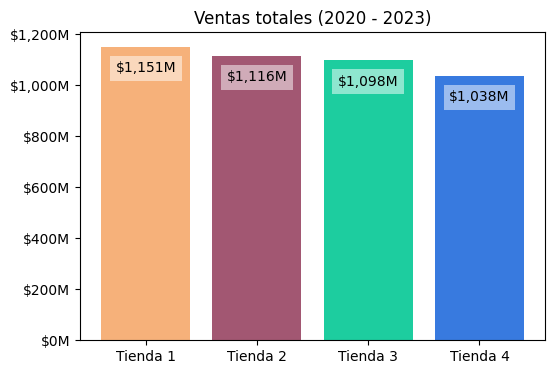

In [17]:
# Gráfico de ventas totales por tienda

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo de la suma total de ventas en cada dataframe
totales_por_tienda = {}

for nombre, df in tiendas_df.items():
    ventas_totales = df['Precio'].sum()
    totales_por_tienda[nombre] = ventas_totales

# Definición de las variables a ser graficadas
x = list(totales_por_tienda.keys())
y = list(totales_por_tienda.values())

# Aplicar formato a números
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Colores por cada barra graficada
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))

for n_x, n_y, c in zip(x, y, colores):
    ax.bar(n_x, n_y, color = c)

# Uso de la función millones para formatear números en el eje y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

ax.set_title("Ventas totales (2020 - 2023)")

# Generar etiquetas en las barras
# Uso de la función millones para formatear las etiquetas de las barras
for i, v in enumerate(y):
    ax.text(i, v-100_000_000, millones(v), ha='center', bbox = {'facecolor':'white', 'alpha':0.5, 'edgecolor':'None'})

plt.show()


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas han tenido ventas totales por más de 1000 millones entre 2020 y 2023.</li>
    <li> La tienda 1 ha reportado las mayores ventas totales, por un valor de 1151 millones. </li>
    <li> La tienda 4 ha reportado las menores ventas totales, por un valor de 1038 millones.</li> 
  </ul>
</div>

##### 6.1.2 Facturación por año

Para realizar el análisis de facturación por año, sólo se escogieron los años que tenían registro de ventas en sus 12 meses para evitar la generación de sesgos (2020 - 2022).

In [18]:
# Tabla resumen de ventas por año (2020 - 2022) y por tienda

# Combinacíon de dataframes
df_combinados = pd.concat([tienda, tienda2, tienda3, tienda4])

# Filtrado de filas pertenecientes a los años 2020 - 2022
df_combinados_2022 = df_combinados.loc[df_combinados['Fecha de Compra'].dt.year.isin([2020, 2021, 2022])]

# Creación de la tabla resumen
ventas_ano = pd.pivot_table(df_combinados_2022, values = 'Precio', index = 'Fecha de Compra', columns = 'Tienda', aggfunc = 'sum', fill_value = 0)
ventas_ano = ventas_ano.resample('YE').sum()
ventas_ano

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,368933200.0,320466600.0,321707500.0,330847700.0
2021-12-31,362120800.0,351215500.0,362954400.0,347823600.0
2022-12-31,316565600.0,358226500.0,350438300.0,302221500.0


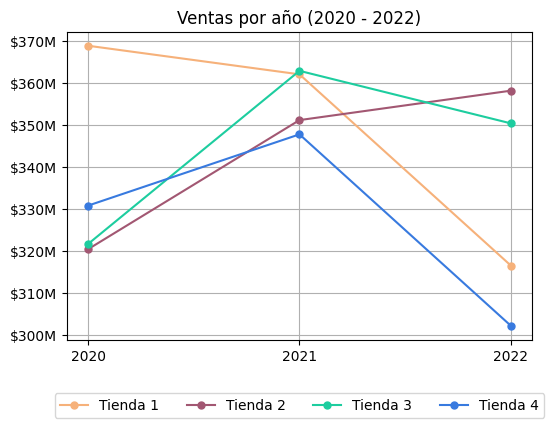

In [19]:
# Gráfica de ventas totales por año (2020 - 2022)

# Creación del gráfico
fig, ax = plt.subplots(figsize = (6,4))

# Colores a utilizar en la gráfica:
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']
for c, columna in zip(colores, ventas_ano.columns):
    ax.plot(ventas_ano.index, ventas_ano[columna], label=columna, color=c, linewidth=1.5, marker='o', markersize=5)

# Personalización de título
ax.set_title('Ventas por año (2020 - 2022)')

# Personalización de ejes
ax.set_xticks(ventas_ano.index)
ax.set_xticklabels(ventas_ano.index.strftime('%Y'))
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Personalización de la leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

ax.grid(True)

plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Hay una caída abrupta en las ventas de la tienda 1 y la tienda 4 en el 2022.</li>
    <li> Se observa una caída ligera en las ventas de la tienda 3 en el 2022 con respecto al 2021.</li>
    <li> La única tienda que ha tenido un crecimiento consistente es la tienda 2.</li>
  </ul>
</div>

##### 6.1.3 Facturación por mes

Se realizó el análisis de facturación por mes entre los años 2020 y 2023 para observar el comportamiento de las ventas durante el año.

In [20]:
# Crear una copia del dataframe combinado
df_combinados_1 = df_combinados.copy()

# Establecer como indice la columna 'Fecha de Compra'
df_combinados_1 = df_combinados_1.set_index('Fecha de Compra')

# Crear la tabla resumen de ventas por día y tienda
ventas_dia = pd.pivot_table(df_combinados_1, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

In [21]:
# Crear tabla resumen con ventas por mes
ventas_mes = ventas_dia.resample('ME').sum()
ventas_mes.head()

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-01-31,33084300.0,31129500.0,23782900.0,19298700.0
2020-02-29,40054000.0,17388800.0,27577000.0,22880400.0
2020-03-31,31562300.0,30515900.0,30024400.0,28533100.0
2020-04-30,33666100.0,27646600.0,35343500.0,39492700.0
2020-05-31,38582900.0,25462300.0,26123800.0,31991400.0


In [22]:
# Cálculo de la media movil cada 6 meses
media_movil = ventas_mes.rolling(window=6).mean()

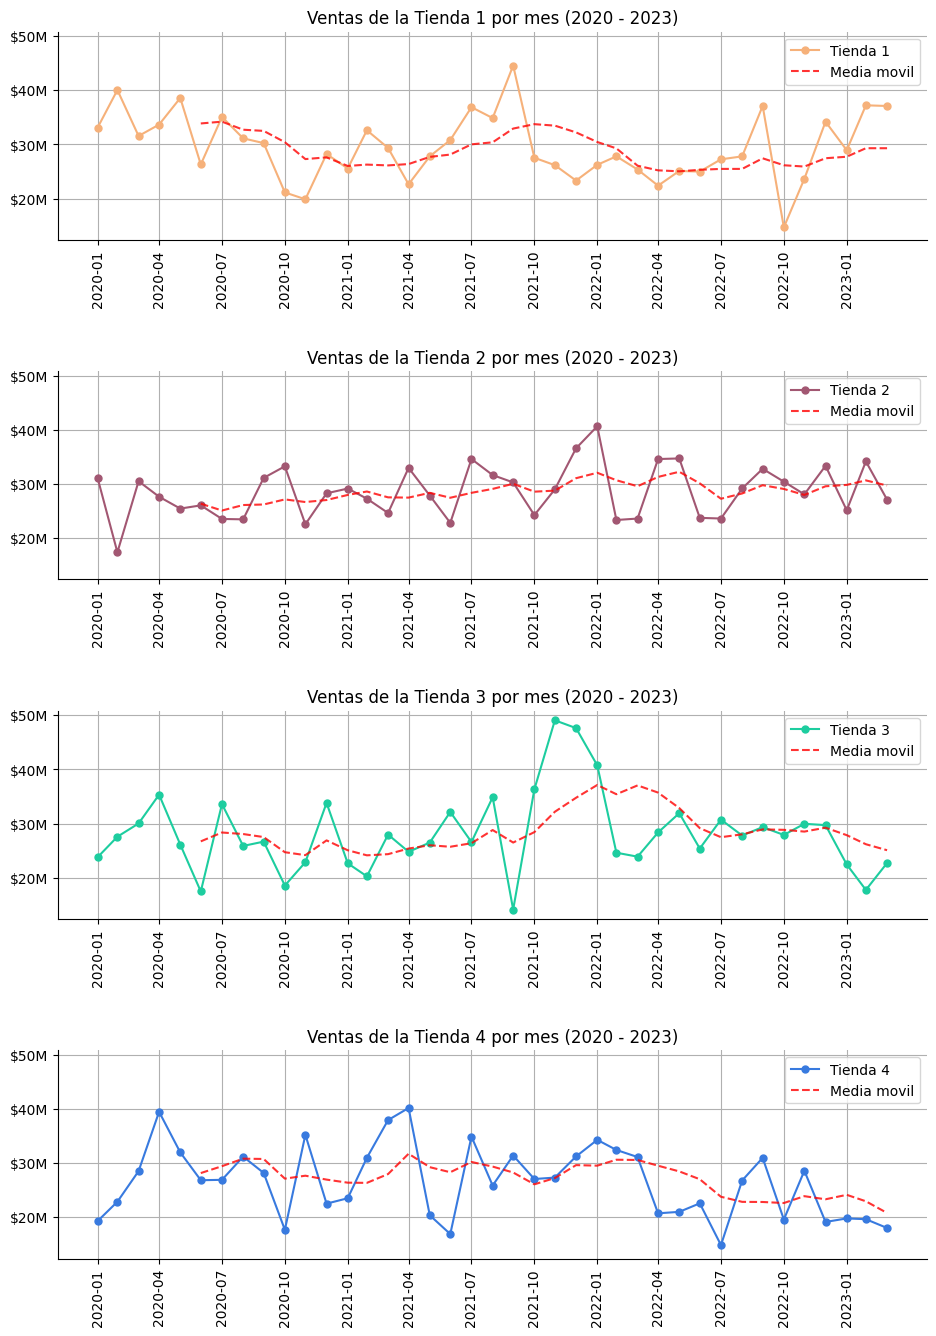

In [23]:
# Grafica de ventas por mes (2020 - 2023) por tienda
fig, ax = plt.subplots(4, 1, figsize=(10,14), sharey=True)

# Colores a usar en las gráficas
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

# Lista de divisiones en el eje x
marcas_x = ventas_mes.index[0:len(ventas_mes)+1:3]

# Creación de la gráfica
for a, color, columna in zip(ax, colores, ventas_mes.columns):

    # Creacion y personalizacion de las gráficas
    a.plot(ventas_mes.index, ventas_mes[columna], label=columna, color=color, marker='o', markersize=5)

    # Graficar las medias móviles
    a.plot(media_movil.index, media_movil[columna], label='Media movil', color='red', alpha=0.8, linestyle='--')

    # Formateo del título de las gráficas
    a.set_title(f'Ventas de la {columna} por mes (2020 - 2023)')

    # Formateo de los valores del eje y
    a.yaxis.set_major_formatter(FuncFormatter(millones))

    # Quitar los bordes derecho y superior de las gráficas
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)

    # Establecer las divisiones en las marcas establecidas
    a.set_xticks(marcas_x)

    # Rotar 90 grados las etiquetas
    a.tick_params(axis='x', rotation=90)

    # Establecer un formato de año-mes en las etiquetas
    a.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    a.grid(True, which='major')

    a.legend()


plt.tight_layout(pad=3)
plt.show()



<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> En general, en ninguna de las tiendas se observa patrones de venta por mes definidos y consistentes a través de los años.</li>
    <li> La media de ventas de la Tienda 1 ha tendido a disminuir ligeramente. </li>
    <li> La Tienda 2 es la tienda que tiene más consistencia en el monto de ventas a lo largo de los años y presenta una ligera tendencia al crecimiento.</li>
    <li> La media de las ventas de la Tienda 3 se ha mantenido, a pesar de tener varias fluctuaciones.</li>
    <li> La media de ventas de la Tienda 4 tienen una tendencia a disminuir. </li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones del análisis de la facturación
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Las Tiendas 2 y 3 presentan la mayor consistencia en facturación. </li>
        <li> A pesar de que la Tienda 1 tiene la mayor facturación total en los 3 años, la media de sus ventas presenta una ligera tendencia a disminuir, y su facturación en el último año (2022) ha disminuido considerablemente.</li>
        <li> La Tienda 4 tiene el peor rendimiento en facturación, obteniendo la menor cantidad acumulada facturada, caídas abruptas en las ventas en el último año y una tendencia a la baja. </li>
    </ul>
  </div>
</div>

#### 6.2 Ventas por categoría

##### 6.2.1 Facturación por categoría
Se realizó el análisis de las ventas totales por categoría, para definir las categorías de productos más rentables.

In [24]:
# Facturación total por categoría
df_combinados_2 = df_combinados.copy()
ventas_categoria = pd.pivot_table(df_combinados_2, values='Precio', index='Categoría del Producto', columns='Tienda', aggfunc='sum', fill_value=0)
ventas_categoria

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0


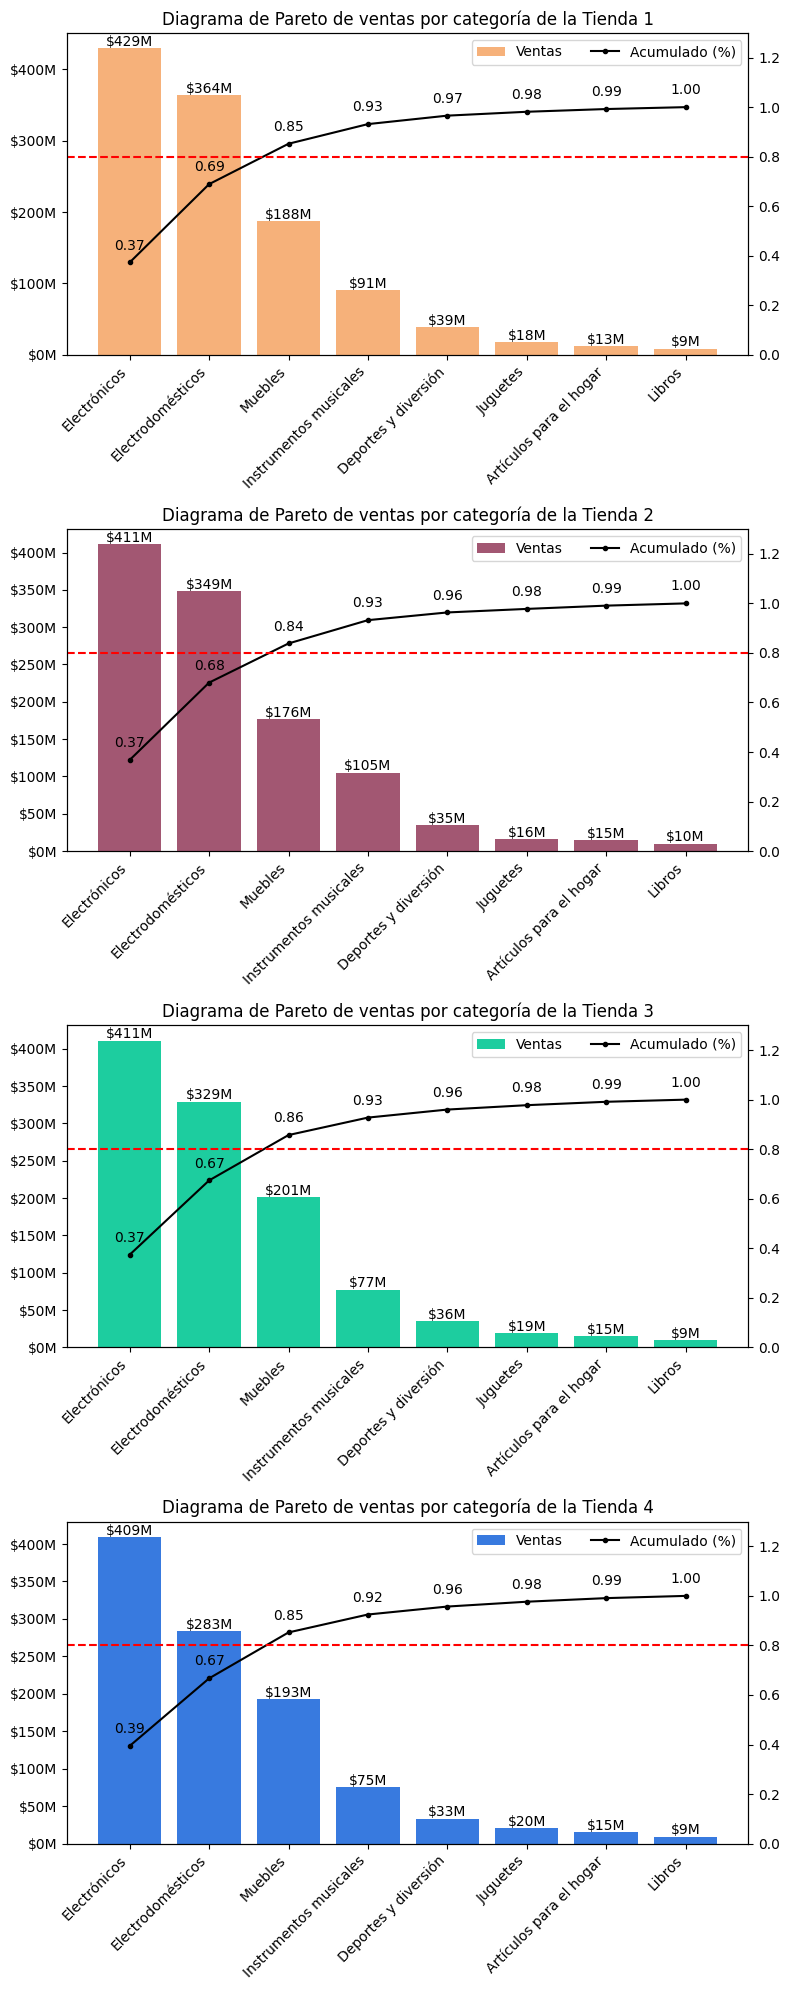

In [25]:
# Diagrama de Pareto de ventas por categoría

fig, axes = plt.subplots(nrows=4, figsize=(8, 20))

# Colores a usar en las gráficas
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

# Realizar el gráfico de Pareto
for i, t, c in zip(range(0,4), ventas_categoria.columns, colores):
    # Ordenar las ventas de mayor a menor
    ventas_ordenadas = ventas_categoria[t].sort_values(ascending=False)

    # Crear segundo eje y
    ax2 = axes[i].twinx()
    ax2.set_ylim(0, 1.3)

    # Porcentaje acumulado de ventas
    y = ventas_ordenadas.cumsum()/ventas_ordenadas.sum()

    # Gráfico de barras
    axes[i].bar(ventas_ordenadas.index, ventas_ordenadas, color=c, label='Ventas')

    # Graficar el porcentaje acumulado
    ax2.plot(ventas_ordenadas.index, y, color='black', label='Acumulado (%)', marker='o', markersize=3)
    
    # Agregar etiquetas en el gráfica de linea
    for x2, y2 in zip(ventas_ordenadas.index, y):
        ax2.text(x2, y2+0.04, f'{y2:.2f}', ha='center', va='bottom')

    # Dibujar línea de corte al 80%
    ax2.axhline(0.8, linestyle='--', color='red')
    
    # Poner valores en las barras
    for k, v1 in enumerate(ventas_ordenadas):
        axes[i].text(k, v1+3_000_000, millones(ventas_ordenadas.iloc[k]), ha='center')

    # Formatear los valores del eje y
    axes[i].yaxis.set_major_formatter(FuncFormatter(millones))

    # Rotar las etiquetas del eje x
    axes[i].tick_params(axis='x', labelrotation=45)

    # Ajustar alineamiento de etiquetas de eje x
    for etiqueta in axes[i].get_xticklabels():
        etiqueta.set_ha('right')
    
    # Titulo de la grafica
    axes[i].set_title(f"Diagrama de Pareto de ventas por categoría de la {t}")

    # Mostrar leyendas combinadas
    objeto1, etiqueta1 = axes[i].get_legend_handles_labels()
    objeto2, etiqueta2 = ax2.get_legend_handles_labels()

    objetos = objeto1 + objeto2
    etiquetas = etiqueta1 + etiqueta2

    ax2.legend(objetos, etiquetas, loc='upper right', ncols=2)



plt.tight_layout()
plt.show()



<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las categorías de productos más vendidos son electronicos, electrodomésticos y muebles. Estas categorías comprenen más del 80% de las ventas totales en todas las tiendas.</li>
    <li> La Tienda 1 lidera las ventas en 2 de las 3 categorías más vendidas.</li>
    <li> La Tienda 4 está en último lugar de ventas en 2 de las 3 categorías más vendidas.</li>
    <li> Las ventas en las demás categorías tienen poco impacto para diferenciar la eficacia de ventas entre las tiendas.</li>
  </ul>
</div>

##### 6.2.2 Categorías más vendidas por año

Se realizó la venta anual de las 3 categorías más rentables (Electrónicos, Electrodomésticos, Muebles) entre los años 2020 y 2022.

In [26]:
# Análisis de las ventas por año de electrodomésticos

# Creación de la tabla de venta de electrodomésticos por año
df_electrodomesticos = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Electrodomésticos') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
venta_electrodomesticos = pd.pivot_table(df_electrodomesticos, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
venta_electrodomesticos = venta_electrodomesticos.resample('YE').sum()
venta_electrodomesticos

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,136132300.0,112443300.0,94273200.0,80890500.0
2021-12-31,107352800.0,112255600.0,115076200.0,100643000.0
2022-12-31,95565700.0,101885600.0,102092000.0,87090100.0


In [27]:
# Análisis de las ventas por año de productos electrónicos

# Creación de la tabla de venta de productos electrónicos por año
df_electronicos = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Electrónicos') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
venta_electronicos = pd.pivot_table(df_electronicos, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
venta_electronicos = venta_electronicos.resample('YE').sum()
venta_electronicos

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,129728600.0,105710100.0,124495300.0,136151000.0
2021-12-31,145941800.0,128888100.0,131232900.0,153352000.0
2022-12-31,106458600.0,141259600.0,140745600.0,97832500.0


In [28]:
# Análisis de las ventas por año de muebles

# Creación de la tabla de venta de muebles por año
df_muebles = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Muebles') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
ventas_muebles = pd.pivot_table(df_muebles, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
ventas_muebles = ventas_muebles.resample('YE').sum()
ventas_muebles

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,50778700.0,53593000.0,63217900.0,63813700.0
2021-12-31,59760800.0,53346500.0,61369400.0,53093300.0
2022-12-31,57180100.0,55396800.0,60764800.0,62414100.0


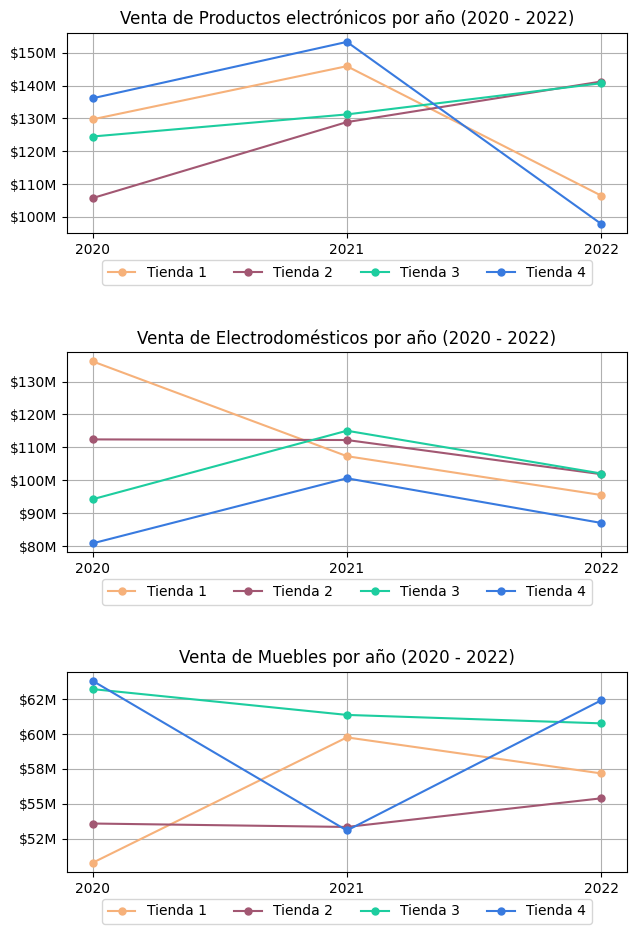

In [29]:
# Gráfica de las ventas de los productos más vendidos por año

fig, ax = plt.subplots(nrows=3, figsize=(7,10))

# Lista de dataframes a utilizar en las gráficas
df_ventas = [venta_electronicos, venta_electrodomesticos, ventas_muebles]
# Lista de los nombres de los dataframes
df_nombres = ['Productos electrónicos', 'Electrodomésticos', 'Muebles']
# Lista de colores por tienda
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']



for a, df, nombre in zip(ax, df_ventas, df_nombres):
    for t, color in zip(df, colores):
        a.plot(df.index, df[t], color=color, label=t, marker='o', markersize=5)

        # Establecer el título de cada gráfica
        a.set_title(f'Venta de {nombre} por año (2020 - 2022)')

        # Formatear los valores de las etiquetas del eje y
        a.yaxis.set_major_formatter(FuncFormatter(millones))
        
        # Marcas en el eje x
        marcas_x = df.index

        # Cambiar las marcas mostradas en el eje x
        a.set_xticks(marcas_x)

        # Formatear los valores de las etiquetas del eje x
        a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Mostrar la leyenda en cada gráfico
        a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncols=4)

        # Mostrar gradilla
        a.grid(True)


plt.tight_layout(pad=3)
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> La Tienda 1 y la Tienda 4 en el 2022 tuvieron un gran descenso en ventas de productos de la categoría de productos electrónicos, que es la categoría que más se vende entre las 4 tiendas.</li>
    <li> La venta de electrodomésticos bajó en las 4 tiendas en el 2022.</li>
    <li> Las tiendas 2 y 3 lideran en el 2022 la venta en 2 de las 3 categorías. </li>
    <li> La Tienda 4 lideró la venta de muebles en el 2022.</li>
  </ul>
</div>

##### 6.2.3 Volumen vendido por categoría
Se realizó un análisis de la cantidad de unidades vendidas por categoría de producto.

In [30]:
# Calcular el conteo de unidades vendidas por categoria
conteo_totales_ventas_categoria = pd.pivot_table(df_combinados_2, values='Producto', index='Categoría del Producto', columns='Tienda', aggfunc='count', fill_value=0)
conteo_totales_ventas_categoria

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [31]:
# Porcentaje de ventas totales por categoría
porcentaje_ventas_categoria = conteo_totales_ventas_categoria.div(conteo_totales_ventas_categoria.sum(axis=0), axis=1)*100

# Dataframe de porcentaje de ventas transpuesto
porcentaje_ventas_categoria_trans = porcentaje_ventas_categoria.T
porcentaje_ventas_categoria_trans.map(lambda x: f'{x:.2f}%')

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,7.25%,12.04%,13.23%,18.99%,7.72%,13.73%,7.33%,19.71%
Tienda 2,7.67%,11.66%,12.93%,17.89%,9.50%,13.27%,8.35%,18.74%
Tienda 3,7.50%,11.74%,11.78%,19.12%,7.50%,13.35%,7.84%,21.15%
Tienda 4,8.52%,11.75%,10.77%,19.13%,7.21%,14.33%,7.93%,20.36%


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas tienen un patrón de demanda similar en relación a las categorías de productos ofertadas.</li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones del análisis de ventas por categoría
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Las 4 tiendas tienen un patrón similar de ventas. </li>
        <li> La mayoría de los ingresos de las tiendas se deben a ventas de productos electrónicos, electrodomésticos y muebles.</li>
        <li> Las Tiendas 1 y 4 tienen las menores ventas en 2 de las 3 categorías más importantes. </li>
        <li> Se debe investigar las causas de la disminución de ventas de electrodomésticos en todas las tiendas en el último año (2022).</li>
        <li> Se debe analizar si la venta de las categorías que generan menos ingresos es rentable o tiene alguna importancia adicional para las tiendas. </li>
    </ul>
  </div>
</div>

#### 6.3 Calificación promedio de la tienda
Se realizó un análisis de las calificaciones recibidas por cada Tienda entre los años 2020 y 2023.


In [32]:
calificacion_media_total = pd.pivot_table(df_combinados_2, index=None, columns='Tienda', values='Calificación', aggfunc='mean')
calificacion_media_total.map(lambda x: f'{x:.2f}')

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Calificación,3.98,4.04,4.05,4.00


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas tienen un promedio de calificaciones similar.</li>
    <li> La diferencia entre la calificación media máxima y mínima es de 0.07.</li>
  </ul>
</div>

In [33]:
# Dataframe con la media anual de la calificación de las tiendas
calificacion_media_ano = pd.pivot_table(df_combinados_2, values='Calificación', index='Fecha de Compra', columns='Tienda', aggfunc='mean')
# Agrupación de promedios por año
calificacion_media_ano = calificacion_media_ano.resample('YE').mean()
# Formateo de las fechas de compra solo por año
calificacion_media_ano.index = calificacion_media_ano.index.year
# Redondeo de los valores de la tabla a 2 decimales
calificacion_media_ano = calificacion_media_ano.round(2)
calificacion_media_ano

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020,3.92,3.99,4.08,4.03
2021,3.98,4.00,3.91,3.98
2022,4.06,4.13,4.12,3.92
2023,4.00,3.98,4.08,4.20


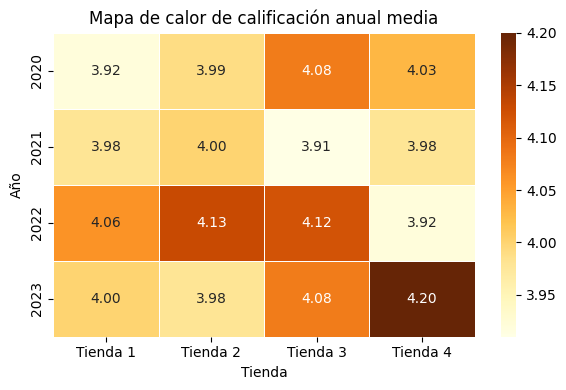

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(calificacion_media_ano, cmap='YlOrBr', annot=True, fmt='.2f', linewidths=0.5)

plt.title('Mapa de calor de calificación anual media', fontsize=12)
plt.xlabel('Tienda')
plt.ylabel('Año')
plt.tight_layout()
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> Hay una mejora global en la calificación de todas las tiendas desde el 2022. </li>
      <li> La Tienda 2 tiene las calificaciones más consistentes a lo largo de los años.</li>
      <li> Actualmente, la tienda mejor calificada es la Tienda 4. </li>
  </ul>
</div>

In [35]:
# Distribución porcentual de las calificaciones
conteo_calificacion_total = pd.pivot_table(df_combinados_2, index='Calificación', columns='Tienda', aggfunc='size')
porcentaje_calificacion_total = conteo_calificacion_total.div(conteo_calificacion_total.sum(axis=0), axis=1)*100
porcentaje_calificacion_total.map(lambda x: f'{x:.2f}%')

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Calificación,,,,
1,13.52%,11.57%,12.59%,13.15%
2,3.65%,3.94%,3.35%,3.60%
3,9.24%,8.86%,8.18%,8.91%
4,18.82%,20.43%,18.40%,19.21%
5,54.77%,55.19%,57.48%,55.13%


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> La distribución porcentual entre las calificaciones (1 al 5) es similar en todas las tiendas. </li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones del análisis de calificación por tienda
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
      <li> No hay diferencias significativas entre las calificaciones de las 4 tiendas. </li>
      <li> En general, las tiendas tienen una buena calificación (promedio alrededor de 4).</li>
      <li> Se requiere mayor información para identificar las causas que ocasionaron las calificaciones bajas.</li>
      <li> La calificación no es factor diferenciador del rendimiento entre tiendas.</li>
    </ul>
  </div>
</div>

#### 6.4 Productos más y menos vendidos
Se realizó un análisis para identificar los productos con mayor y menor volumen de venta por cada tienda entre los años 2020 y 2023.

In [36]:
# Generación de tabla de cantidad de unidades vendidas por categoría y tienda
ventas_productos = pd.pivot_table(df_combinados_2, index='Producto', columns='Tienda', aggfunc='size', fill_value=0)

In [37]:
# Top 5 de productos más vendidos por tienda

# Lista de tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Número de productos a mostrar
top_n = 5

# Diccionario para almacenar los Top productos de cada tienda
top_productos_max = {}

for t in tiendas:
    ventas_mayores_tienda = ventas_productos[[t]].sort_values(by=t, ascending=False).head(top_n)
    ventas_mayores_tienda['Producto y ventas'] = ventas_mayores_tienda.index + ' (' + ventas_mayores_tienda[t].astype(str) + ')'

    # Resetear el índice
    top_productos_max[t] = ventas_mayores_tienda['Producto y ventas'].reset_index(drop=True)

# Convertir el diccionario a un DataFrame
top_productos_max_df = pd.DataFrame(top_productos_max)

# Mostrar el df
print('Top 5 productos más vendidos por tienda:')
top_productos_max_df


Top 5 productos más vendidos por tienda:


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Armario (60),Iniciando en programación (65),Kit de bancas (57),Cama box (62)
1,TV LED UHD 4K (60),Microondas (62),Mesa de comedor (56),Cubertería (59)
2,Microondas (60),Batería (61),Cama king (56),Cama king (56)
3,Secadora de ropa (58),Pandereta (58),Set de ollas (55),Dashboards con Power BI (56)
4,Mesa de noche (56),Guitarra acústica (58),Mesa de noche (55),Carrito de control remoto (55)


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> Los 5 productos más venidos de la Tienda 1 pertenecen a las categorías de Muebles (2), Electrónicos (1) y Electrodomésticos (2). </li>
      <li> Los 5 productos más venidos de la Tienda 2 pertenecen a las categorías de Libros (1), Electrónicos (1) e Instrumentos musicales (3). </li>
      <li> Los 5 productos más venidos de la Tienda 3 pertenecen a las categorías de Muebles (4) y Artículos para el hogar (1). </li>
      <li> Los 5 productos más venidos de la Tienda 4 pertenecen a las categorías de Muebles(3), Libros (1) y Juguetes (1). </li>
  </ul>
</div>

In [38]:
# Top 5 de productos menos vendidos por tienda

# Lista de tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Número de productos a mostrar
top_n = 5

# Diccionario para almacenar los Top productos de cada tienda
top_productos_min = {}

for t in tiendas:
    ventas_menores_tienda = ventas_productos[[t]].sort_values(by=t, ascending=True).head(top_n)
    ventas_menores_tienda['Producto y ventas'] = ventas_menores_tienda.index + ' (' + ventas_menores_tienda[t].astype(str) + ')'

    # Resetear el índice
    top_productos_min[t] = ventas_menores_tienda['Producto y ventas'].reset_index(drop=True)

# Convertir el diccionario a un DataFrame
top_productos_min_df = pd.DataFrame(top_productos_min)

# Mostrar el df
print('Top 5 productos menos vendidos por tienda:')
top_productos_min_df

Top 5 productos menos vendidos por tienda:


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Auriculares con micrófono (33),Juego de mesa (32),Bloques de construcción (35),Guitarra eléctrica (33)
1,Celular ABXY (33),Impresora (34),Set de vasos (36),Armario (34)
2,Olla de presión (35),Mesa de comedor (34),Mochila (36),Guitarra acústica (37)
3,Pandereta (36),Sillón (35),Microondas (36),Ciencia de datos con Python (38)
4,Ciencia de datos con Python (39),Auriculares (37),Vaso térmico (38),Lavadora de ropa (38)


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> Los 5 productos menos venidos de la Tienda 1 pertenecen a las categorías de Electrónicos (2), Artículos para el hogar(1), Instrumentos musicales (1) y Libros (1). 
      </li>
      <li> Los 5 productos menos venidos de la Tienda 2 pertenecen a las categorías de Juguetes (1), Electrónicos (2) y Muebles (2). </li>
      <li> Los 5 productos menos venidos de la Tienda 3 pertenecen a las categorías de Juguetes (1), Artículos para el hogar (1), Deportes y diversión (2) y Electrónicos (1).
       </li>
      <li> Los 5 productos menos venidos de la Tienda 4 pertenecen a las categorías de Instrumentos musicales (2), Muebles (1), Libros (1) y Electrodomésticos (1). </li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones del análisis de productos más y menos vendidos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> La Tienda 1 y la tienda 3 tienen una buena distribución de ventas, ya que se enfocan en vender los productos pertenecientes a las categorías que más ingresos generan (Eléctrónicos, Electrodomésticos y Muebles). </li>
        <li> La Tienda 4 debe mejorar la distribución de sus ventas. </li>
        <li> La Tienda 2 no tiene priorizadas las ventas en las categorías más importantes. </li>
    </ul>
  </div>
</div>

#### 6.5 Costo medio de envío
Se realizó un análisis del costo medio de envío por tienda, categoría de producto y lugar de compra.

##### 6.5.1 Análisis del costo de envío medio por tienda

In [49]:
costo_envio_mediana = pd.pivot_table(df_combinados_2, values='Costo de envío', index=None, columns='Tienda', aggfunc='mean')
costo_envio_mediana.map(lambda x: f'${x:,.0f}')

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Costo de envío,"$26,019","$25,216","$24,806","$23,459"


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> El costo medio de envío difiere ligeramente entre tiendas. </li>
      <li> La Tienda 4 tiene el costo de envío menor, y la Tienda 1 tiene el costo de envío mayor. </li>
  </ul>
</div>

##### 6.5.2 Análisis del costo medio de envío por categoría

In [81]:
# Generar df de costo de envio por categoria
envio_categoria = pd.pivot_table(df_combinados_2, values='Costo de envío', index='Categoría del Producto', columns='Tienda', aggfunc='mean')

# Transponer la tabla de costo de envío por categoría
envio_categoria_trans = envio_categoria.T
envio_categoria_trans.map(lambda x: f'{x:,.2f} $')

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,"3,764.91 $","7,468.66 $","61,935.90 $","51,258.26 $","26,834.62 $","3,023.15 $","2,699.42 $","21,494.41 $"
Tienda 2,"4,424.31 $","6,826.55 $","60,838.03 $","51,692.42 $","24,811.16 $","2,835.78 $","2,821.32 $","21,348.64 $"
Tienda 3,"4,589.83 $","6,942.60 $","62,928.78 $","48,460.98 $","23,213.56 $","3,306.98 $","2,683.24 $","21,611.42 $"
Tienda 4,"4,249.25 $","6,390.25 $","59,143.70 $","48,399.78 $","23,258.24 $","3,291.42 $","2,891.44 $","21,323.54 $"


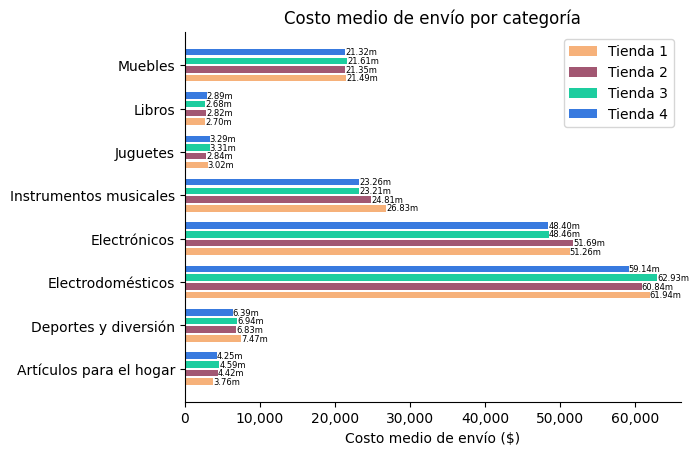

In [68]:
# Grafica de costo medio de envio por categoría
fig, ax =plt.subplots()

num_tiendas = len(envio_categoria.columns)
num_cat = len(envio_categoria.index)
ubicacion_categoria = np.arange(num_cat)*4

ancho_barra3 = 0.6
ubicacion_tienda = np.linspace(-2*ancho_barra3, 2*ancho_barra3, num_tiendas)

# Colores
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

# Generar la gráfica
for i, t, c in zip(range(num_tiendas), envio_categoria.columns, colores):

    pos_y1 = ubicacion_categoria + ubicacion_tienda[i]
    ax.barh(pos_y1, envio_categoria[t], height=ancho_barra3, label=t, color=c)

    # Formatear eje y
    ax.set_yticks(ubicacion_categoria)
    ax.set_yticklabels(envio_categoria.index)

    # Formatear eje x
    ax.set_xlabel('Costo medio de envío ($)')

    # Agregar etiquetas de valores
    for j, et in enumerate(envio_categoria[t]):
        ax.text(et, pos_y1[j], f'{et/1000:,.2f}m', va='center', fontsize=6)

    # Formatear título y eje x
    ax.set_title('Costo medio de envío por categoría')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

    # Quitar recuadro 
    ax.spines[['top', 'right']].set_visible(False)

    # Formatear leyenda
    ax.legend()

plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
      <li> La categoría de productos que genera más gastos de envío es la categoría de Electrodomésticos. </li>
      <li> Los costos de envío por tienda son similares. </li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones del análisis del costo de envío
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> El costo de envío de las 4 tiendas es similar en promedio total y en promedio por categoría. </li>
        <li> El costo de envío no es un factor diferenciador del rendimiento entre las tiendas. </li>
    </ul>
  </div>
</div>

### 7. Conclusiones

Con base en los análisis realizados, se pueden generar las siguientes conclusiones para determinar cuál es la tienda con peor rendimiento:

- Análisis de la facturación: la Tienda 4 tiene el menor rendimiento.
- Análisis de ventas por categoría: las Tiendas 1 y 4 tienen menores ventas en 2 de las 3 categorías que generan mayores ingresos.
- Análisis de calificaciones: no es un factor diferenciador del rendimiento de las tiendas.
- Análisis de productos más y menos vendidos: las Tiendas 2 y 4 deben mejorar la distribución de sus ventas para orientarlas a las categorías que generan mayores ingresos.
- Análisis de costo de envío: no es un factor diferenciador del rendimiento de las tiendas.

<div style="background-color: #F7CFD8; color: #872341; padding: 10px; border-left: 8px solid #BE3144; border-radius: 5px;">
  <strong>De acuerdo a los análisis realizados, se sugiere que se venda la Tienda 4, ya que es la que tiene peor rendimiento de todas las 4 tiendas.</strong>
</div>

### 8. Recomendaciones

Para mejorar el rendimiento de las 3 tiendas restantes, se recomienda realizar los siguientes análisis:

- Se debe realizar un seguimiento a las ventas de la Tienda 1, que tienen una tendencia a disminuir.

- Se debe decidir si se reduce las categorías de los productos que se venden en las tiendas, para priorizar aquellas que generan más ingresos. Para esto, sería bueno realizar:
    - Análisis de los costos asociados a la venta de los productos, para determinar la ganancia neta que producen.
    - Análisis del perfil de los clientes que compran en las tiendas.

- Se debe analizar la causa de la disminución de la venta de electrodomésticos en todas las tiendas.

- Se debe analizar el por qué de las calificaciones bajas que han recibido las tiendas.

- Se deben generar estrategias para que la distribución de las ventas en las tiendas favorezcan la compra de productos que generan mayores ingresos.